In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [18]:
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

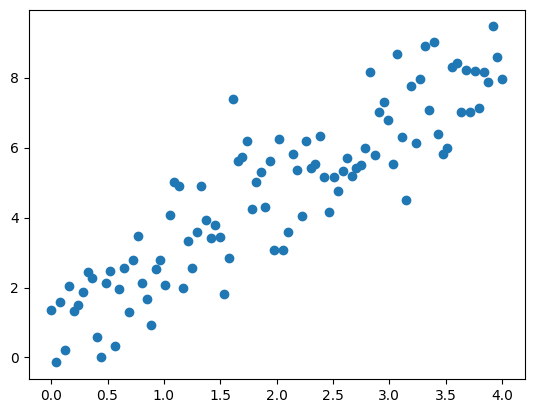

In [19]:
plt.scatter(x,y)

In [20]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias

In [21]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [22]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [23]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 730.6428833007812
Epoch: 1, loss: 518.9056396484375
Epoch: 2, loss: 368.7964172363281
Epoch: 3, loss: 262.3555603027344
Epoch: 4, loss: 186.8601531982422
Epoch: 5, loss: 133.29678344726562
Epoch: 6, loss: 95.279296875
Epoch: 7, loss: 68.2830581665039
Epoch: 8, loss: 49.10194396972656
Epoch: 9, loss: 35.46393585205078
Epoch: 10, loss: 25.758804321289062
Epoch: 11, loss: 18.845136642456055
Epoch: 12, loss: 13.913747787475586
Epoch: 13, loss: 10.390819549560547
Epoch: 14, loss: 7.869365215301514
Epoch: 15, loss: 6.060617446899414
Epoch: 16, loss: 4.759610176086426
Epoch: 17, loss: 3.820788860321045
Epoch: 18, loss: 3.1407270431518555
Epoch: 19, loss: 2.6458852291107178
Epoch: 20, loss: 2.283926010131836
Epoch: 21, loss: 2.0175602436065674
Epoch: 22, loss: 1.8201870918273926
Epoch: 23, loss: 1.6728001832962036
Epoch: 24, loss: 1.5617941617965698
Epoch: 25, loss: 1.4774065017700195
Epoch: 26, loss: 1.412612795829773
Epoch: 27, loss: 1.3623433113098145
Epoch: 28, loss: 1.3229

In [24]:
print(model.weight.numpy())
print(model.bias.numpy())

1.8495092
1.0200099


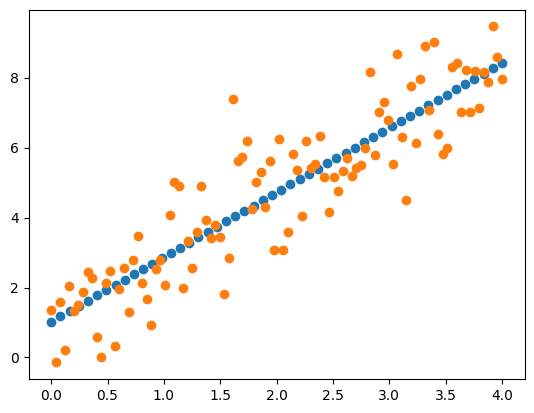

In [25]:
new_x = np.linspace(0,4,50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()
plt.scatter(new_x,new_y)
plt.scatter(x,y)